# **Transformação de variáveis aleatórias**

Conectando a pasta do google drive ao colab para acessar o arquivo de dados.

In [1]:
# Montar o Google Drive no Colab
from google.colab import drive
drive.mount('/content/drive')

# Caminho para o arquivo dadosMonalisa.txt no Google Drive
caminho_arquivo = "/content/drive/MyDrive/TEFE_pos/A1/dadosMonalisa.txt"

Mounted at /content/drive


# Importando bibliotecas

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Preparando os dados do arquivo.

In [3]:
# Listas para armazenar os dados
Theta = []
contagens = []
sigma = []

# Abrindo e lendo dadosMonalisa.txt
with open(caminho_arquivo, 'r') as file:
    next(file)  # Pula a primeira linha (títulos das colunas)
    for line in file:
        # Divide a linha em colunas usando o separador '\t'
        dados = line.strip().split('\t')
        # Converte os dados para o tipo float e adiciona eles às listas
        Theta.append(float(dados[0]))
        contagens.append(float(dados[1]))
        sigma.append(float(dados[2]))

# Verifica se os dados foram corretamente salvos
print("Theta:", Theta)
print("contagens:", contagens)
print("sigma:", sigma)

Theta: [0.0, 0.5235987755982988, 1.0471975511965976, 1.5707963267948966, 2.0943951023931953, 2.6179938779914944, 3.141592653589793]
contagens: [16059.0, 11679.0, 6623.0, 6039.0, 6534.0, 11488.0, 16569.0]
sigma: [280.0, 194.0, 133.0, 111.0, 178.0, 224.0, 381.0]


# **1**. obter os coeficientes 'b' ajustados aos seus dados pelo Método dos Mínimos Quadrados. Testar a qualidade do ajuste pelo gráfico dos resíduos normalizados e pelo teste de qui-quadrado.

b0:  6050.82397956883
b2:  -614.0444157085522
b4:  10752.218342763072
Matriz de covariância Vb:
[[   5535.65152507  -24517.34817538   20527.20878656]
 [ -24517.34817538  237656.74950311 -242065.71823031]
 [  20527.20878656 -242065.71823031  266950.70222132]]
sigma_b0:  74.40195914806311
sigma_b2:  487.500512310617
sigma_b4:  516.6727225442853
Chi2: 1.9185837727900688
Chi2 reduzido: 0.4796459431975172


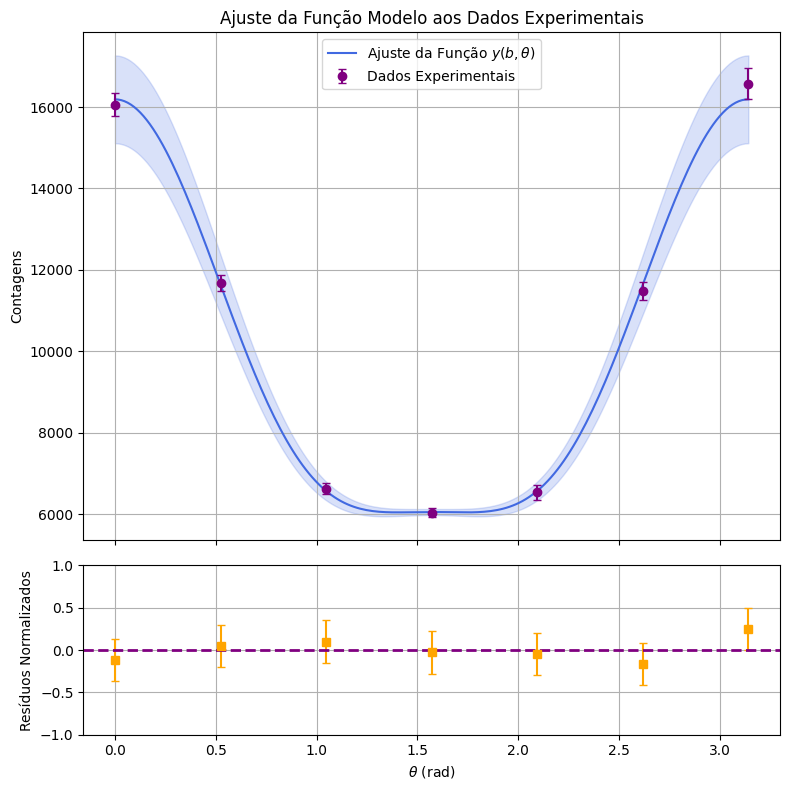

In [4]:
# Função modelo y(b, theta)
def fmb(theta, b0, b2, b4):
  return b0 + b2*(np.cos(theta))**2 + b4*(np.cos(theta))**4

# Ajuste dos parâmetros pelo método dos mínimos quadrados
params, cov = curve_fit(fmb, Theta, contagens, sigma=sigma)

# Coeficientes ajustados
b0, b2, b4 = params

print("b0: ", b0)
print("b2: ", b2)
print("b4: ", b4)
print("==============================")


# Matriz de covariância Vb
Vb = cov
# Imprimindo a matriz de covariância Vb
print("Matriz de covariância Vb:")
print(Vb)
print("==============================")

print("sigma_b0: ", np.sqrt(Vb[0,0]))
print("sigma_b2: ", np.sqrt(Vb[1,1]))
print("sigma_b4: ", np.sqrt(Vb[2,2]))


# Residuos
residuos_reduzidos = (contagens - fmb(Theta, b0, b2, b4)) / sigma
chi2 = np.sum((residuos_reduzidos)**2)

num_param = 3
ngl = len(contagens) - num_param

residuos_norm = residuos_reduzidos / ngl
# propagando incertezas:
inc_residuos_norm = 1 / ngl

# Chi2 reduzido
chi2_red = chi2 / ngl



print("Chi2:", chi2)
print("==============================")
print("Chi2 reduzido:", chi2_red)


ang = np.linspace(0,np.pi,200)


# Calculando os limites superiores e inferiores para a curva de ajuste
y_upper_b = fmb(ang, b0 + np.sqrt(np.abs(Vb[0, 0])), b2 + np.sqrt(np.abs(Vb[1, 1])), b4 + np.sqrt(np.abs(Vb[2, 2])))
y_lower_b = fmb(ang, b0 - np.sqrt(np.abs(Vb[0, 0])), b2 - np.sqrt(np.abs(Vb[1, 1])), b4 - np.sqrt(np.abs(Vb[2, 2])))


# Crie subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Gráfico dos dados com o ajuste
ax1.plot(ang, fmb(ang, b0, b2, b4), label= r'Ajuste da Função $y(b,\theta)$', color='royalblue')
ax1.fill_between(ang, y_lower_b, y_upper_b, color='royalblue', alpha=0.2)  # Intervalo de confiança
ax1.errorbar(Theta, contagens, yerr=sigma, fmt='o', label='Dados Experimentais', color='purple', capsize=3)
ax1.set_ylabel('Contagens')
ax1.set_title('Ajuste da Função Modelo aos Dados Experimentais')
ax1.legend(loc='upper center')
ax1.grid(True)

# Gráfico dos resíduos normalizados
ax2.errorbar(Theta, residuos_norm, yerr=inc_residuos_norm, fmt='s', color='orange', capsize=3)
ax2.axhline(y=0, color='purple', linestyle='--', linewidth=2)
ax2.set_xlabel(r'$\theta$ (rad)')
ax2.set_ylabel('Resíduos Normalizados')
ax2.set_ylim(-1., 1.)
ax2.grid(True)


# Ajuste o layout
plt.tight_layout()

# Mostre o gráfico
plt.show()



# 2. Determinar os valores da função para os ângulos do conjunto 𝜙 = {20°, 40°, 70°, 85°}, junto com sua matriz de covariância, usando os resultados obtidos (b e Vb).

Calcular os valores da função modelo para os ângulos fornecidos

In [5]:
# Ângulos do conjunto phi em radianos
phi_deg = np.array([20, 40, 70, 85])
phi = np.radians(phi_deg)

Calcular a matriz de covariância e os valores da função modelo

In [16]:
# Valores da função para os ângulos de phi
y_phi = fmb(phi, b0, b2, b4)



# Função para calcular a matriz de covariância V_phi
def calcular_matriz_covariancia_phi(Vb, phi_rad):
    M = len(phi)
    F = np.zeros((M, 3))
    for j in range(M):
        F[j] = (np.cos(phi_rad[j]))**(2 * np.array([0, 1, 2]))
    V_phi = F @ Vb @ F.T
    return V_phi


# Calcular a matriz de covariância V_phi
V_phi = calcular_matriz_covariancia_phi(Vb, phi)
print("Matriz de covariância V_phi:")
print(V_phi)
print()


# Exibindo os valores da função e suas respectivas covariâncias para os ângulos de phi
for i in range(len(phi)):
    print(f"Para ângulo de {phi_deg[i]} graus:")
    print("Valor da função:", y_phi[i])
    print("Incerteza do valor: ", np.sqrt(V_phi[i,i]))
    print()


Matriz de covariância V_phi:
[[ 8522.64834083  3033.06874834  -302.31242701  -133.0831953 ]
 [ 3033.06874834  6561.695189    1507.08743154 -1544.68673148]
 [ -302.31242701  1507.08743154  2888.54580529  2948.09660343]
 [ -133.0831953  -1544.68673148  2948.09660343  5179.04854658]]

Para ângulo de 20 graus:
Valor da função: 13892.417440484836
Incerteza do valor:  92.31819073632919

Para ângulo de 40 graus:
Valor da função: 9393.148834680738
Incerteza do valor:  81.00429117644208

Para ângulo de 70 graus:
Valor da função: 6126.125640291013
Incerteza do valor:  53.74519332261531

Para ângulo de 85 graus:
Valor da função: 6046.7800370976165
Incerteza do valor:  71.96560669221331



# 3. Determinar os coeficientes "a" com a fórmula (5), bem como a matriz de covariâncias Va, com uma fórmula análoga à (6), usando C no lugar de F. Verificar graficamente que 𝑦(𝑎̂; 𝜃) = 𝑦(𝑏⃗̂; 𝜃) para todos ângulos.

Comparando y(a,theta) e y(b, theta) obtemos:

b0 = a0 - 1/2 * a2 + 3/8 * a4

b2 = 0 * a0 + 3/2 * a2 - 30/8 * a4

b4 = 35/8 * a4

Assim, podemos construir a matriz B tal que b = B a. E, em seguida, invertê-la para obter a = C b onde C = B^(-1).

In [17]:
# b = B a
#sendo b = (b0 , b2, b4) e a = (a0 , a2 , a4)

# Definição da matriz B
B = np.array([
    [1., -1/2, 3/8],
    [0, 3/2, -15/4],
    [0, 0, 35/8]
])


C = np.linalg.inv(B)

print("Matriz C: ")
print(C)
print()



# a = Cb
# Coeficientes b obtidos na parte i
b = np.array([b0, b2, b4])
# Calculando 'a' partir de 'b' e 'C'
a0, a2, a4 = np.dot(C, b)

# Exibindo os valores de 'a'
print("Parâmetros:")
print("a0:", a0)
print("a2:", a2)
print("a4:", a4)
print()

# Calculando a matriz de covariância de 'a'
# Va = C Vb C^{-1}

# Calculando a matriz de covariância Va
Va = np.dot(np.dot(C, Vb), C.transpose())

print("Incertezas:")
print("s_a0:", np.sqrt(Va[0,0]))
print("s_a2:", np.sqrt(Va[1,1]))
print("s_a4:", np.sqrt(Va[2,2]))
print()

# Exibindo a matriz de covariância Va
print("Matriz de covariância Va:")
print(Va)
print()

Matriz C: 
[[1.         0.33333333 0.2       ]
 [0.         0.66666667 0.57142857]
 [0.         0.         0.22857143]]

Parâmetros:
a0: 7996.586176218593
a2: 5734.761823487482
a4: 2457.6499069172733

Incertezas:
s_a0: 47.016388078333236
s_a2: 91.4427406815077
s_a4: 118.09662229583664

Matriz de covariância Va:
[[ 2210.54074793   323.01254109 -1547.70823146]
 [  323.01254109  8361.77482335 -2019.1741885 ]
 [-1547.70823146 -2019.1741885  13946.81219769]]



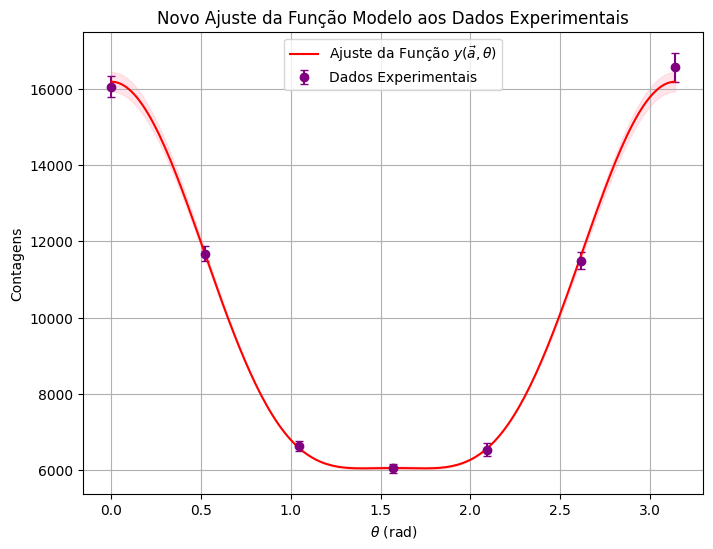

Chi2_am: 1.918583772790067
Chi2 reduzido am: 0.47964594319751674


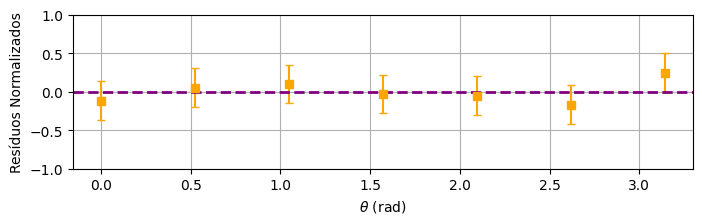

In [36]:
# Nova função modelo y(a, theta)
def fma(theta, a0, a2, a4):
    return a0 + a2 * (3 * np.cos(theta)**2 - 1) / 2 + a4 * (35 * np.cos(theta)**4 - 30 * np.cos(theta)**2 + 3) / 8

# Ajustando os parâmetros a partir dos dados experimentais
params_a = [a0, a2, a4]  # Coeficientes a obtidos anteriormente
y_a = fma(Theta, *params_a)

ang = np.linspace(0.,np.pi, 200)

# Calculando os limites superiores e inferiores para a curva de ajuste
y_upper_a = fma(ang, params_a[0] + np.sqrt(np.abs(Va[0, 0])), params_a[1] + np.sqrt(np.abs(Va[1, 1])), params_a[2] + np.sqrt(np.abs(Va[2, 2])))
y_lower_a = fma(ang, params_a[0] - np.sqrt(np.abs(Va[0, 0])), params_a[1] - np.sqrt(np.abs(Va[1, 1])), params_a[2] - np.sqrt(np.abs(Va[2, 2])))


ang2 = (0.,np.pi,200)

# Gráfico dos pontos experimentais e do novo ajuste y(a, theta) com intervalo de confiança
plt.figure(figsize=(8, 6))
plt.errorbar(Theta, contagens, yerr=sigma, fmt='o', label='Dados Experimentais', color = 'purple', capsize=3)
plt.plot(ang, fma(ang, *params_a), label=r'Ajuste da Função $y(\vec{a},\theta)$', color='red')
plt.fill_between(ang, y_lower_a, y_upper_a, color='pink', alpha=0.4)  # Intervalo de confiança
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Contagens')
plt.title('Novo Ajuste da Função Modelo aos Dados Experimentais')
plt.legend()
plt.grid(True)
plt.show()


# Residuos
residuos_reduzidos_am = (contagens - fma(Theta, a0, a2, a4)) / sigma
chi2_am = np.sum((residuos_reduzidos_am)**2)

num_param = 3
ngl = len(contagens) - num_param

residuos_norm_am = residuos_reduzidos_am / ngl
# propagando incertezas:
inc_residuos_norm_am = 1 / ngl

# Chi2 reduzido
chi2_red_am = chi2_am / ngl



print("Chi2_am:", chi2_am)
print("==============================")
print("Chi2 reduzido am:", chi2_red_am)




# Gráfico dos resíduos normalizados
plt.figure(figsize=(8, 2))
plt.errorbar(Theta, residuos_norm_am, yerr=inc_residuos_norm_am, fmt='s', color='orange', capsize=3)
plt.axhline(y=0, color='purple', linestyle='--', linewidth=2)
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Resíduos Normalizados')
plt.ylim(-1., 1.)
plt.grid(True)
plt.show()



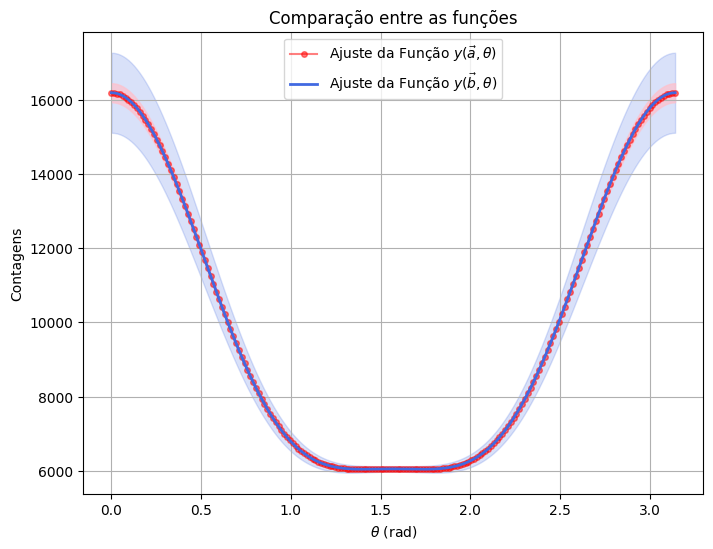

In [33]:

# Gráfico dos pontos experimentais e do novo ajuste y(a, theta) com intervalo de confiança
plt.figure(figsize=(8, 6))

plt.fill_between(ang, y_lower_b, y_upper_b, color='royalblue', alpha=0.2)  # Intervalo de confiança
plt.plot(ang, fma(ang, *params_a), label=r'Ajuste da Função $y(\vec{a},\theta)$', marker = 'o', color='red', alpha = 0.5, markersize=4.)
plt.fill_between(ang, y_lower_a, y_upper_a, color='pink', alpha=0.7)  # Intervalo de confiança
plt.plot(ang, fmb(ang, b0, b2, b4), label=r'Ajuste da Função $y(\vec{b},\theta)$', color='royalblue', linewidth = 2)
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Contagens')
plt.title('Comparação entre as funções')
plt.legend()
plt.grid(True)
plt.show()



4. determinar os valores da função para os ângulos do conjunto 𝜙 = {20°, 40°, 70°, 85°}, junto com sua matriz de covariância, usando os resultados obtidos (a e Va).

In [37]:
# Ângulos do conjunto phi em radianos
phi_deg = np.array([20, 40, 70, 85])
phi = np.radians(phi_deg)
# Valores da função para os ângulos de phi
ya_phi = fma(phi, a0, a2, a4)



# Função para calcular a matriz de covariância V_phi
def calcular_matriz_covariancia_phi(Va, phi_rad):
    M = len(phi_rad)
    F = np.zeros((M, 3))
    for j in range(M):
        F[j] = [1,
                (3 * np.cos(phi_rad[j])**2 - 1) / 2,
                (35 * np.cos(phi_rad[j])**4 - 30 * np.cos(phi_rad[j])**2 + 3) / 8]
    V_phi = F @ Va @ F.T
    return V_phi


# Calcular a matriz de covariância V_phi
Va_phi = calcular_matriz_covariancia_phi(Va, phi)
print("Matriz de covariância Va_phi:")
print(Va_phi)
print()


# Exibindo os valores da função e suas respectivas covariâncias para os ângulos de phi
for i in range(len(phi)):
    print(f"Para ângulo de {phi_deg[i]} graus:")
    print("Valor da função:", ya_phi[i])
    print("Incerteza da função: ", np.sqrt(Va_phi[i,i]))
    print()


Matriz de covariância Va_phi:
[[ 8522.64834083  3033.06874834  -302.31242701  -133.0831953 ]
 [ 3033.06874834  6561.695189    1507.08743154 -1544.68673148]
 [ -302.31242701  1507.08743154  2888.54580529  2948.09660343]
 [ -133.0831953  -1544.68673148  2948.09660343  5179.04854658]]

Para ângulo de 20 graus:
Valor da função: 13892.417440484835
Incerteza da função:  92.3181907363292

Para ângulo de 40 graus:
Valor da função: 9393.148834680738
Incerteza da função:  81.00429117644208

Para ângulo de 70 graus:
Valor da função: 6126.125640291014
Incerteza da função:  53.74519332261531

Para ângulo de 85 graus:
Valor da função: 6046.780037097617
Incerteza da função:  71.96560669221331



5. Verificar a compatibilidade dos resultados dos itens ii e iv.

In [11]:
import pandas as pd

# Criando um DataFrame com os dados
data = {
    'Ângulo (graus)': phi_deg,
    'y_phi para b': ["{:.12f}".format(value) for value in y_phi],
    'y_phi para a': ["{:.12f}".format(value) for value in ya_phi],
}


df = pd.DataFrame(data)

# Exibindo a tabela
print(df)

print('========================================================================')

print("Matriz de covariância Va_phi:")
print(Va_phi)
print()

print("Matriz de covariância Vb_phi:")
print(V_phi)

   Ângulo (graus)        y_phi para b        y_phi para a
0              20  13892.417440484836  13892.417440484835
1              40   9393.148834680738   9393.148834680738
2              70   6126.125640291013   6126.125640291014
3              85   6046.780037097617   6046.780037097617
Matriz de covariância Va_phi:
[[ 8522.64834083  3033.06874834  -302.31242701  -133.0831953 ]
 [ 3033.06874834  6561.695189    1507.08743154 -1544.68673148]
 [ -302.31242701  1507.08743154  2888.54580529  2948.09660343]
 [ -133.0831953  -1544.68673148  2948.09660343  5179.04854658]]

Matriz de covariância Vb_phi:
[[ 8522.64834083  3033.06874834  -302.31242701  -133.0831953 ]
 [ 3033.06874834  6561.695189    1507.08743154 -1544.68673148]
 [ -302.31242701  1507.08743154  2888.54580529  2948.09660343]
 [ -133.0831953  -1544.68673148  2948.09660343  5179.04854658]]


# 6. obter os coeficientes 'a' ajustados aos seus dados pelo Método dos Mínimos Quadrados e comparar com os resultados do item 3.

---



In [12]:
# Ajustando os parâmetros a partir dos dados experimentais com a função modelo y(a, theta)
params_a, cov_a = curve_fit(fma, Theta, contagens, sigma=sigma)

# Coeficientes ajustados para a
a0_a, a2_a, a4_a = params_a

print("Matriz de covariâncias Va por MMQ: ")
print(cov_a)
print("==============================")

print("Matriz de covariâncias Va no item 3: ")
print(Va)
print("==============================")


# Exibindo os valores de 'a' ajustados
print("Parâmetros ajustados MMQ (a):")
print("a0:", a0_a)
print("a2:", a2_a)
print("a4:", a4_a)
print("==============================")

# Comparando os resultados com os coeficientes a obtidos no item 3
print("Coeficientes a obtidos no item 3:")
print("a0:", a0)
print("a2:", a2)
print("a4:", a4)
print("==============================")

# Calculando a diferença entre os coeficientes ajustados e os coeficientes a obtidos no item 3
diff_a0 = abs(a0_a - a0)
diff_a2 = abs(a2_a - a2)
diff_a4 = abs(a4_a - a4)

print("Diferença entre os coeficientes ajustados e os coeficientes a obtidos no item 3:")
print("Diferença a0:", diff_a0)
print("Diferença a2:", diff_a2)
print("Diferença a4:", diff_a4)


Matriz de covariâncias Va por MMQ: 
[[ 2210.54069039   323.01241837 -1547.70800815]
 [  323.01241837  8361.77464898 -2019.17381339]
 [-1547.70800815 -2019.17381339 13946.81245444]]
Matriz de covariâncias Va no item 3: 
[[ 2210.54074793   323.01254109 -1547.70823146]
 [  323.01254109  8361.77482335 -2019.1741885 ]
 [-1547.70823146 -2019.1741885  13946.81219769]]
Parâmetros ajustados MMQ (a):
a0: 7996.586176131286
a2: 5734.761823476576
a4: 2457.649907671235
Coeficientes a obtidos no item 3:
a0: 7996.586176218593
a2: 5734.761823487482
a4: 2457.6499069172733
Diferença entre os coeficientes ajustados e os coeficientes a obtidos no item 3:
Diferença a0: 8.730694389669225e-08
Diferença a2: 1.0905750968959183e-08
Diferença a4: 7.539615580753889e-07


Matriz de covariâncias Va: 
[[ 2210.54069039   323.01241837 -1547.70800815]
 [  323.01241837  8361.77464898 -2019.17381339]
 [-1547.70800815 -2019.17381339 13946.81245444]]
Parâmetros ajustados (a):
a0: 7996.586176131286
a2: 5734.761823476576
a4: 2457.649907671235
Incerteza dos arâmetros ajustados (a):
a0: 47.01638746642859
a2: 91.44273972809893
a4: 118.0966233829066
Valor do teste de qui-quadrado: 1.918583772790067
Valor do qui-quadrado reduzido: 0.4796459431975172


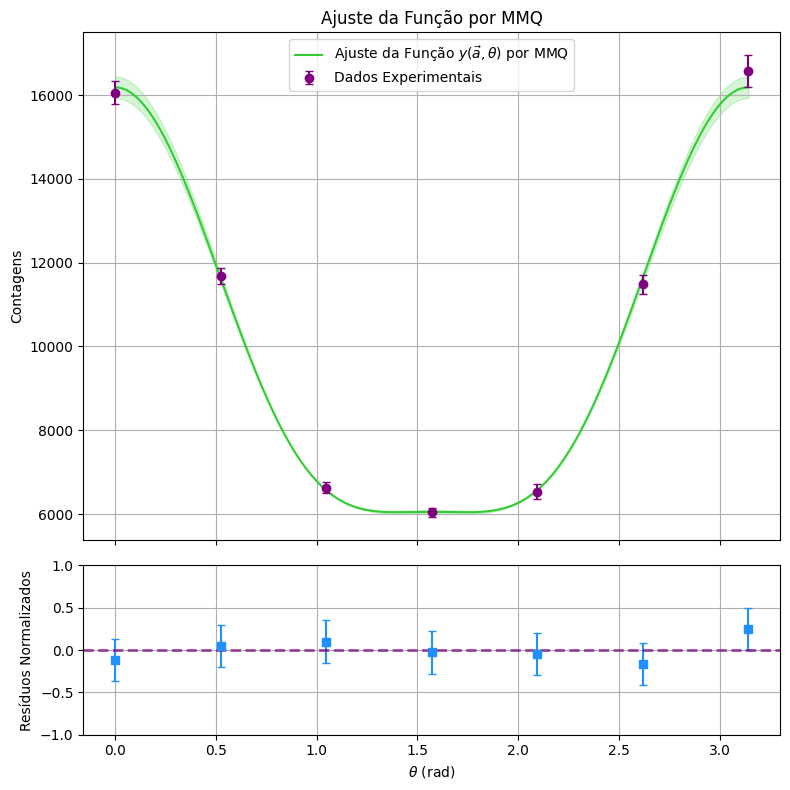

In [46]:

print("Matriz de covariâncias Va: ")
print(cov_a)
print("==============================")
print("Parâmetros ajustados (a):")
print("a0:", a0_a)
print("a2:", a2_a)
print("a4:", a4_a)
print("==============================")

print("Incerteza dos arâmetros ajustados (a):")
print("a0:", np.sqrt(cov_a[0,0]))
print("a2:", np.sqrt(cov_a[1,1]))
print("a4:", np.sqrt(cov_a[2,2]))
print("==============================")

# Teste de qui-quadrado
res_a_red = (contagens - fma(Theta, a0, a2, a4)) / sigma
chi2_a= np.sum((res_a_red)**2)

ngl = len(contagens) - 3

res_a_norm = res_a_red / ngl
# propagando incertezas:
inc_residuos_norm = 1/ngl

# Qui-quadrado reduzido
chi2_a_red = chi2_a / ngl



print("Valor do teste de qui-quadrado:", chi2_a)
print("==============================")
print("Valor do qui-quadrado reduzido:", chi2_red)


# Calculando os limites superiores e inferiores para a curva de ajuste
y_upper_a = fma(ang, a0_a + np.sqrt(np.abs(cov_a[0, 0])), a2_a + np.sqrt(np.abs(cov_a[1, 1])), a4_a + np.sqrt(np.abs(cov_a[2, 2])))
y_lower_a = fma(ang, a0_a - np.sqrt(np.abs(cov_a[0, 0])), a2_a - np.sqrt(np.abs(cov_a[1, 1])), a4_a - np.sqrt(np.abs(cov_a[2, 2])))



# Crie subplots
fig, (ax1a, ax2a) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Gráfico dos dados com o ajuste
ax1a.plot(ang, fma(ang, a0_a, a2_a, a4_a), label=r'Ajuste da Função $y(\vec{a},\theta)$ por MMQ', color='limegreen')
ax1a.fill_between(ang, y_lower_a, y_upper_a, color='limegreen', alpha=0.2)  # Intervalo de confiança
ax1a.errorbar(Theta, contagens, yerr=sigma, fmt='o', label='Dados Experimentais', color= 'purple', capsize=3)
ax1a.set_ylabel('Contagens')
ax1a.set_title('Ajuste da Função por MMQ')
ax1a.legend(loc='upper center')
ax1a.grid(True)

# Gráfico dos resíduos normalizados
ax2a.errorbar(Theta, res_a_norm, yerr = inc_residuos_norm, fmt = 's', color = 'dodgerblue', capsize=3)
ax2a.axhline(y=0, color='purple', linestyle='--', linewidth=2, alpha=0.7)
ax2a.set_xlabel(r'$\theta$ (rad)')
ax2a.set_ylabel('Resíduos Normalizados')
ax2a.set_ylim(-1., 1.)
ax2a.grid(True)


# Ajuste o layout
plt.tight_layout()

# Mostre o gráfico
plt.show()



In [14]:
# Comparando ajustes y(b, theta) com y(a, theta)
from IPython.display import display, Markdown

data = {
    '': [r'$y(\theta,b)$', r'$y(\theta,a)$'],
    'Chi2': [f'{chi2:.{15}f}', f'{chi2_a:.{15}f}'],
    'Chi2_red': [f'{chi2_red:.{16}f}', f'{chi2_a_red:.{16}f}'],
}


df = pd.DataFrame(data)
# Aplicando LaTeX diretamente aos valores do DataFrame
styled_df = df.applymap(lambda x: f'${x}$')

# Exibindo a tabela
display(Markdown(styled_df.to_markdown()))

|    |                 | Chi2                | Chi2_red             |
|---:|:----------------|:--------------------|:---------------------|
|  0 | $$y(\theta,b)$$ | $1.918583772790069$ | $0.4796459431975172$ |
|  1 | $$y(\theta,a)$$ | $1.918583772790067$ | $0.4796459431975167$ |